In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df=pd.read_csv('/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 9)

In [8]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [9]:
df.duplicated().sum()

0

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
df=df.drop(columns=['Serial No.'])

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
x=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [18]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [27]:
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

In [28]:
seq=Sequential()

In [30]:
seq.add(Dense(units=7,activation='relu',input_dim=7))
seq.add(Dense(units=7,activation='relu'))
seq.add(Dense(units=1,activation='linear'))

In [40]:
seq.compile(optimizer='adam',loss='mean_squared_error',metrics=['r2_score'])

In [41]:
seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
data=seq.fit(x_train,y_train,epochs=16,batch_size=20,validation_split=0.2)

Epoch 1/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - r2_score: 0.7692 - val_loss: 0.0029 - val_r2_score: 0.8677
Epoch 2/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - r2_score: 0.7736 - val_loss: 0.0029 - val_r2_score: 0.8689
Epoch 3/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - r2_score: 0.8039 - val_loss: 0.0029 - val_r2_score: 0.8676
Epoch 4/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - r2_score: 0.8107 - val_loss: 0.0029 - val_r2_score: 0.8691
Epoch 5/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - r2_score: 0.8273 - val_loss: 0.0029 - val_r2_score: 0.8653
Epoch 6/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - r2_score: 0.8001 - val_loss: 0.0029 - val_r2_score: 0.8673
Epoch 7/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - r2_score: 0.8090 - val_loss: 0.0028 - val_r2_score: 0.8698
Epoch 8/16
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - r2_score: 0.7882 - val_loss: 0.0030 - val_r2_score:

In [44]:
y_pred=seq.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [45]:
r2_score(y_test,y_pred)

0.8001528722839402

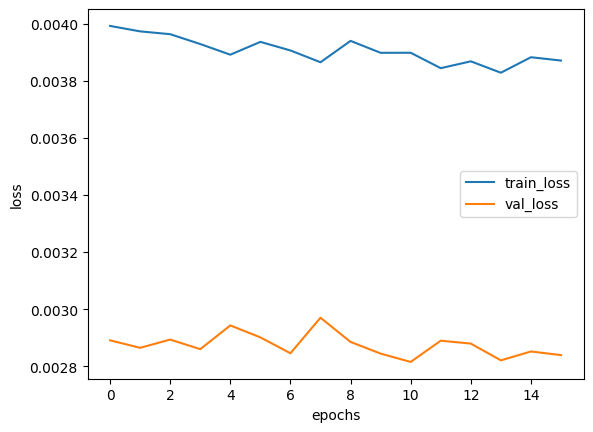

In [49]:
plt.plot(data.history['loss'],label='train_loss')
plt.plot(data.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

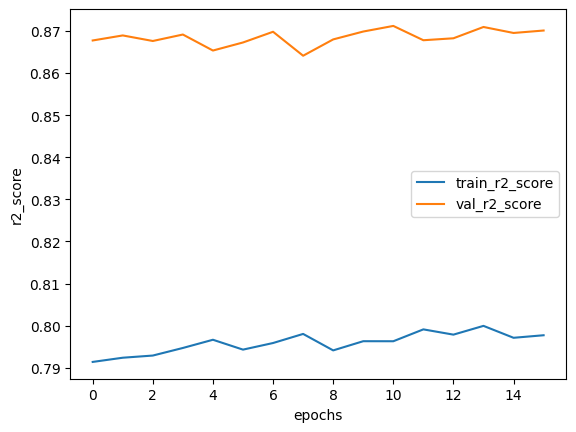

In [50]:
plt.plot(data.history['r2_score'],label='train_r2_score')
plt.plot(data.history['val_r2_score'],label='val_r2_score')
plt.xlabel('epochs')
plt.ylabel('r2_score')
plt.legend()
plt.show()